<a href="https://colab.research.google.com/github/chlitsas/ml-basketball/blob/master/basketball3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import sys
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from random import random
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split


In [5]:
pd.set_option('display.max_columns', None)

data = pd.read_csv(
    'https://liveproject-resources.s3.amazonaws.com/other/deeplearningbasketballscores/Games-Calculated.csv',
    names=['date', 'home_team', 'home_pts', 'road_team', 'road_pts', 'home_avg_pts_for', 'home_avg_pts_against', 'road_avg_pts_for', 'road_avg_pts_against',  'result']
    )
data.head()

,date,home_team,home_pts,road_team,road_pts,home_avg_pts_for,home_avg_pts_against,road_avg_pts_for,road_avg_pts_against,result
0,2015-11-13,Hawaii,87,Montana State,76,87.0,76.0,76.0,87.0,11
1,2015-11-13,Eastern Michigan,70,Vermont,50,70.0,50.0,50.0,70.0,20
2,2015-11-13,Yale,70,Fairfield,57,70.0,57.0,57.0,70.0,13
3,2015-11-13,Central Michigan,89,Jacksonville State,83,89.0,83.0,83.0,89.0,6
4,2015-11-13,Iowa State,68,Colorado,62,68.0,62.0,62.0,68.0,6


In [46]:
train, test = train_test_split(data[['home_avg_pts_for', 'home_avg_pts_against', 'road_avg_pts_for', 'road_avg_pts_against', 'result']], test_size=0.2, random_state=42, shuffle=True)

train_inputs = train[['home_avg_pts_for', 'home_avg_pts_against', 'road_avg_pts_for', 'road_avg_pts_against']].to_numpy()
train_outputs = train[['result']].to_numpy()
test_inputs = test[['home_avg_pts_for', 'home_avg_pts_against', 'road_avg_pts_for', 'road_avg_pts_against']].to_numpy()
test_outputs = test[['result']].to_numpy()
train_inputs

array([[83.16666667, 76.5       , 79.        , 80.33333333],
       [82.33333333, 71.33333333, 69.        , 77.        ],
       [78.82352941, 61.29411765, 68.7       , 73.35      ],
       ...,
       [73.        , 57.        , 66.33333333, 69.66666667],
       [69.        , 60.        , 58.5       , 86.25      ],
       [83.4       , 70.4       , 63.33333333, 70.33333333]])

In [51]:
model = Sequential()  
#model.add(Dense(1, input_dim=1, activation='relu'))
model.add(Dense(units=1, input_shape=[4]))
model.add(Dense(units=1, input_shape=[6]))
model.add(Dense(units=1, input_shape=[2]))
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.1), metrics=['accuracy'])
history = model.fit(train_inputs, train_outputs, epochs=20, verbose=False)

score, acc = model.evaluate(test_inputs, test_outputs, batch_size=128)
print(score)
print(acc)


4032/4032 [==============================] - 0s 9us/step
106.14087446909102
0.0409226194024086


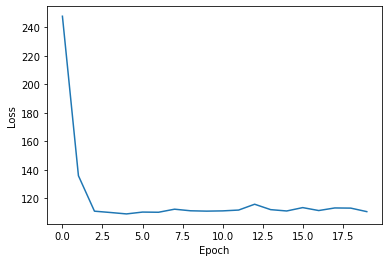

In [52]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history.history['loss'])